<a href="https://colab.research.google.com/github/daryafralova/DS-study-projects/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импортируем необходимые библиотеки
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Загружаем данные MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Нормализуем данные (приводим к диапазону [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Изменяем форму данных для подачи в CNN (28x28x1, т.е. одноцветное изображение)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# Создаём модель свёрточной нейросети (CNN)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 выходных нейронов для 10 классов
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Компилируем модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Обучаем модель
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8977 - loss: 0.3251 - val_accuracy: 0.9847 - val_loss: 0.0467
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9846 - loss: 0.0512 - val_accuracy: 0.9843 - val_loss: 0.0483
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.9896 - loss: 0.0344 - val_accuracy: 0.9905 - val_loss: 0.0298
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9906 - val_loss: 0.0286
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9938 - loss: 0.0194 - val_accuracy: 0.9892 - val_loss: 0.0406


In [9]:
# Сохраняем модель
model.save('my_model_MNIST.keras')

In [10]:
#Проверяем точность на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Тестовая точность: {test_acc}')

313/313 - 2s - 6ms/step - accuracy: 0.9892 - loss: 0.0406
Тестовая точность: 0.9891999959945679


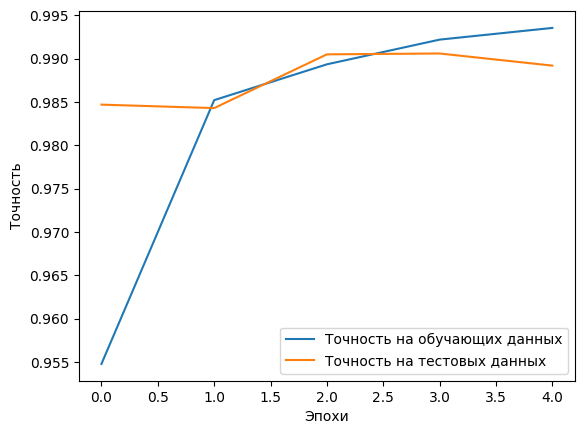

In [11]:
# Визуализируем график точности и потерь
plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label='Точность на тестовых данных')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend(loc='lower right')
plt.show()